Join the data from Part 1 with the data from Part 2 to create a new dataframe.

### Using Yelp Data

In [37]:
import pandas as pd

In [38]:
bike_df = pd.read_json('bike_df')
yelp_df = pd.read_json('yelp_df')

In [39]:
# Calculate restaurant count for each station ID
restaurant_count = yelp_df['Station ID'].value_counts().reset_index()
restaurant_count.columns = ['Station ID', 'Restaurant Count']

# Merge restaurant count with bike_df
joined_bike_df = pd.merge(bike_df, restaurant_count, on='Station ID', how='left')

In [40]:
# Calculate average rating for each station ID
average_rating = yelp_df.groupby('Station ID')['Rating'].mean().reset_index()
average_rating.columns = ['Station ID', 'Average Rating']

# Merge average rating with bike_df
joined_bike_df = pd.merge(joined_bike_df, average_rating, on='Station ID', how='left')

# Print the updated bike_df DataFrame
joined_bike_df

,Station ID,Name,Latitude,Longitude,Number of Bikes,Restaurant Count,Average Rating
0,fb337bbed72e2be090071e199899b2be,Queen St E / Woodward Ave,43.665269,-79.319796,8,10,3.80
1,4ff88d5880e71aa40d34cfe5d09b0ca7,Primrose Ave / Davenport Rd,43.671420,-79.445947,0,10,4.45
2,a09c67c0b419654d907c9134b108e328,Queen St. E / Rhodes Ave.,43.666224,-79.317693,4,10,3.95
3,d6a9daee68070a8b106cfb598d81308c,Bond St / Queen St E,43.653236,-79.376716,3,10,4.15
4,8f8af40d9388c8a3962559e8681d3db7,Church St / Alexander St,43.663722,-79.380288,10,10,4.10
...,...,...,...,...,...,...,...
96,a7ca61373064c6581461132f1ae050de,Broadview Ave / Westwood Ave,43.684865,-79.356602,18,10,4.15
97,62a1c39596c3d512dfa04f1d29b81035,Fulton Ave / Pape Ave,43.683950,-79.347046,1,10,4.10
98,b960be1eba97f5aefc6ad39ecc93cb11,Cosburn Ave / Donlands Ave,43.690537,-79.341307,2,10,4.00
99,908b17c0d06011373777bace0a3cd74c,Beltline Trail / Chaplin Cres.,43.704461,-79.423122,2,10,4.00


In [41]:
joined_bike_df.to_json('joined_bike_df')

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [47]:
# Merge average rating with bike_df
EDA_bike_df = pd.merge(bike_df, yelp_df, on='Station ID', how='left')

EDA_bike_df

,Station ID,Name,Latitude_x,Longitude_x,Number of Bikes,Restaurant name,Location,Latitude_y,Longitude_y,Rating
0,fb337bbed72e2be090071e199899b2be,Queen St E / Woodward Ave,43.665269,-79.319796,8,Lake Inez,"1471 Gerrard Street E, Toronto, ON M4L 2A1, Ca...",43.672340,-79.320640,4.5
1,fb337bbed72e2be090071e199899b2be,Queen St E / Woodward Ave,43.665269,-79.319796,8,O Sushi,"6 Coxwell Avenue, Toronto, ON M4L 3A7, Canada",43.666540,-79.316930,3.5
2,fb337bbed72e2be090071e199899b2be,Queen St E / Woodward Ave,43.665269,-79.319796,8,The Burger's Priest,"1636 Queen Street E, Toronto, ON M4L 1G3, Canada",43.666700,-79.315585,3.5
3,fb337bbed72e2be090071e199899b2be,Queen St E / Woodward Ave,43.665269,-79.319796,8,Jaclyn's,"1588 Queen Street E, Toronto, ON M4L 1G1, Canada",43.666270,-79.318020,4.5
4,fb337bbed72e2be090071e199899b2be,Queen St E / Woodward Ave,43.665269,-79.319796,8,Maha's,"226 Greenwood Avenue, Toronto, ON M4L 2R2, Canada",43.671670,-79.328530,4.0
...,...,...,...,...,...,...,...,...,...,...
996,d2ce6ae839b7df2c912ab140253a5574,Lake Shore Blvd E / Leslie St,43.659195,-79.329196,12,Eastside Social,"1008 Queen Street E, Toronto, ON M4M 1K1, Canada",43.661432,-79.339113,4.5
997,d2ce6ae839b7df2c912ab140253a5574,Lake Shore Blvd E / Leslie St,43.659195,-79.329196,12,Completo,"5 Coady Avenue, Toronto, ON M4M 2Y9, Canada",43.662633,-79.334058,4.5
998,d2ce6ae839b7df2c912ab140253a5574,Lake Shore Blvd E / Leslie St,43.659195,-79.329196,12,La Paella,"1146 Queen Street E, Toronto, ON M4M 1L1, Canada",43.662530,-79.334270,4.0
999,d2ce6ae839b7df2c912ab140253a5574,Lake Shore Blvd E / Leslie St,43.659195,-79.329196,12,Kibo Sushi House,"1169 Queen Street E, Toronto, ON M4M 1L5, Canada",43.662600,-79.332683,4.0


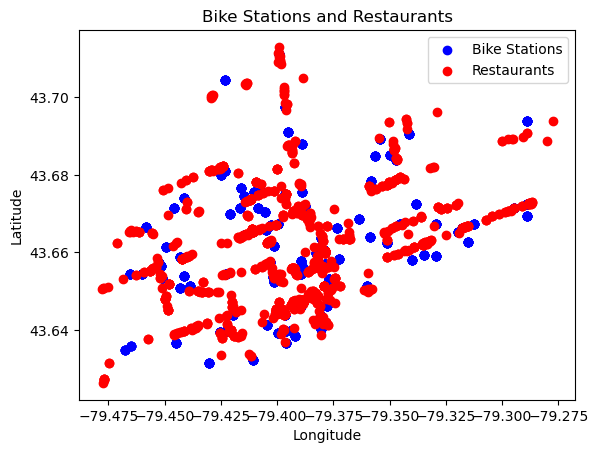

In [48]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(EDA_bike_df['Longitude_x'], EDA_bike_df['Latitude_x'], color='blue', label='Bike Stations')
plt.scatter(EDA_bike_df['Longitude_y'], EDA_bike_df['Latitude_y'], color='red', label='Restaurants')

# Set the plot title and labels
plt.title('Bike Stations and Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a legend
plt.legend()

# Display the plot
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Look at the data before and after the join to validate your data.